# EDA Подготовка данных для модели прогнозирования оценки учеников.

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

# Задачи
Провести первичную обработку данных.
Посмотреть на распределение признака для числовых переменных, устранить выбросы.
Оценить количество уникальных значений для номинативных переменных.
По необходимости преобразовать данные (убрать, заменить пропущенные значения).
Провести корреляционный анализ количественных переменных, отобрать некоррелирующие переменные.
Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину.
Сформулировать выводы относительно качества данных и тех переменных, которые  будут использованы в дальнейшем построении модели.

Создание DataFrame и иморт нужных библиотек:

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_columns', 50)
student = pd.read_csv('stud_math.csv')

# Первичная обработка данных:

In [76]:
student.info()
student.columns  # меняем название колонок для удобства.
student.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                   'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
                   'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
                   'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel',
                   'free_time', 'go_out', 'health', 'absences', 'score']
display(student.head(5))


# функция просмотра выбросов
def df_show_emission(df, column):
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    IQR = perc75 - perc25
    df_emission = df.loc[(df[column] < perc25 - 1.5*IQR)
                         ].append(df.loc[(df[column] > perc75 + 1.5*IQR)])
    result = df_emission[column].unique().tolist()
    result.sort()
    print('Значения выбросов:')
    return result


# функция просмотра информации числовых столбцов
def column_numeric_info(df, column):
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    IQR = perc75 - perc25
    return print('Пропусков значений:', df[column].isnull().sum(), '\n\n'
                 'Выбросов:', len(df.loc[(df[column] < perc25 - 1.5*IQR)]
                                  .append(df.loc[(df[column] > perc75 + 1.5*IQR)])), '\n\n'
                 '25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'
                 .format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}]."
                 .format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR), '\n\n',
                 df[column].describe(), '\n\n',
                 df[column].hist())


# функция просмотра информации номинативных столбцов
def column_object_info(df, column):
    return print('Пропусков значений:', df[column].isnull().sum(), '\n\n'
                 'Уникальных значений:', df[column].nunique(), '\n\n',
                 df[column].value_counts())


def fillna_mode(df, column):    # функция замены пропущенных значения на моду
    column_values = student.loc[:, column].value_counts().index.tolist()
    score_mean = []
    for i in range(0, len(column_values)):
        score_mean.append(
            round(student.loc[student[column] == column_values[i]]['score'].mean(), 2))
    mode = df[column].mode()
    df[column] = df[column].fillna(mode[0])
    score_mean_upgrade = []
    for i in range(0, len(column_values)):
        score_mean_upgrade.append(
            round(student.loc[student[column] == column_values[i]]['score'].mean(), 2))
        print('Изменение среднего значения score после замены данных для',
              column_values[i], ':', round((score_mean[i] - score_mean_upgrade[i]) * 100 / score_mean[i], 2), '%')


def get_boxplot(column):  # функция построения boxplot
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=student, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_barplot(column, column_values_list):  # функция построения barplot
    fig, ax = plt.subplots()
    ax.set_title(f'Зависимость баллов от {column}')
    ax.set_xlabel(f'значения {column}')
    ax.set_ylabel('среднее значение score ')
    for i in range(0, len(column_values_list)):
        ax.bar(column_values_list[i], student.loc[student[column]
                                                  == column_values_list[i]]['score'].mean())
        print('Среднее значения score для', column_values_list[i], ':', round(
            student.loc[student[column] == column_values_list[i]]['score'].mean(), 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


В  DataFrame 13 числовых столбцов и 17 строковых столбцов.
Столбцов с количественными переменными всего 3 ('age','absences','score'). В остальных численных столбцах числами обозначены  категориальные признаки.

Проверим данные на количество пропусков, удалим строки и столбцы с большим количеством отсутсвующих значений.

In [77]:
display(student.isnull().sum(axis=1).value_counts())  # пропуски в строках
for col in student.columns:  # пропуски в столбцах
    pct_missing = student[col].isnull().mean()
    print('{} - {}%'.format(col, round(pct_missing*100)))

1    131
2     98
0     97
3     47
4     15
5      5
6      2
dtype: int64

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
fam_size - 7.0%
p_status - 11.0%
m_edu - 1.0%
f_edu - 6.0%
m_job - 5.0%
f_job - 9.0%
reason - 4.0%
guardian - 8.0%
travel_time - 7.0%
study_time - 2.0%
failures - 6.0%
school_sup - 2.0%
fam_sup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime_granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
fam_rel - 7.0%
free_time - 3.0%
go_out - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


В большинстве строк есть не более 3 пропущенных значений. Максимальное количество пропущенных значений - 6.
Исходя из этого, оставим все строки для дальнейшей работы. В столбцах не болле 11% процентов пропусков - оставим все столбцы.

In [78]:
display(student.duplicated().sum())  # проверяем  на дубли

0

Дублей так же нет - оставим все строки для дальнейшей работы.

#  Числовых переменные:
Для числовых столбцов напишем универсальную функцию вывода (пустых значений, выбросов, гистограммы распределений) column_numeric_info.

## age

Пропусков значений: 0 

Выбросов: 1 

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0]. 

 count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64 

 AxesSubplot(0.125,0.125;0.775x0.755)


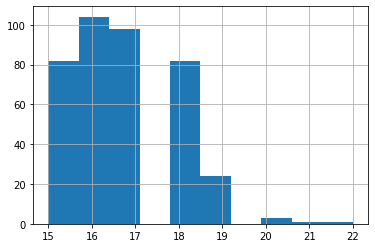

In [79]:
column_numeric_info(student, 'age')

Пропусков значений нет. Есть выброс, для него используем функцию df_show_emission.

Значения выбросов:


[22]

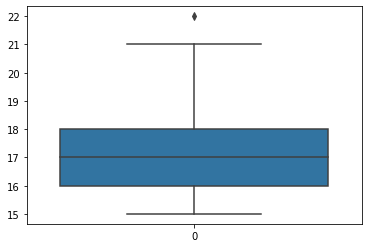

In [80]:
display(df_show_emission(student, 'age'))
sns.boxplot(data=student.age)

Данное значение находится в пределах заданного в условиях интервала возраста (15 - 22 года)  и находится рядом со значением верхней границы выброса (21). Оставляем его.

# absences

Пропусков значений: 12 

Выбросов: 17 

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0]. 

 count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64 

 AxesSubplot(0.125,0.125;0.775x0.755)


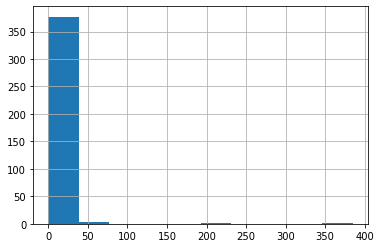

In [81]:
column_numeric_info(student, 'absences')

Количество пропущенных занятий.  Пропустив много занятий ученик скорее всего плохо сдаст экзамен. Большинство значений распределено очень плотно между 0 и 8. Есть явные выбросы.

1. Заменим пропущенные значения
2. Удалим выбросы

Так как большинство значений распределено очень плотно между 0 и 8, заменим  пропущенные значения на среднее по столбцу.

In [82]:
# среднне по столбцу без выбросов
mean_absences = round(student.loc[student.absences <= 30].absences.mean())
student.absences = student.absences.fillna(
    mean_absences)  # заменяем пропуски на среднее

In [83]:
display(df_show_emission(student, 'absences'))

Значения выбросов:


[21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 28.0,
 30.0,
 38.0,
 40.0,
 54.0,
 56.0,
 75.0,
 212.0,
 385.0]

По методу IQR верхняя граница выбросов 20. 10 из 17 значений выбросов находятся в пределах границы 30. Пользуясь здравым смыслом убираем выбросы больше 30 и не теряем 10 информативных значений.

In [84]:
student = student.loc[student.absences <= 30]

# score

Пропусков значений: 6 

Выбросов: 0 

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0]. 

 count    382.000000
mean      52.264398
std       23.043739
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64 

 AxesSubplot(0.125,0.125;0.775x0.755)


50.0     54
55.0     44
0.0      37
75.0     33
65.0     31
60.0     31
40.0     29
70.0     27
45.0     25
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

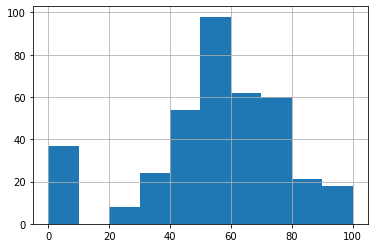

In [85]:
column_numeric_info(student, 'score')
display(student.score.value_counts())

Баллы по госэкзамену по математике. Целевой столбец. Распределение выглядит очень странно : 37 учеников получили 0 за экзамен  и ни один от 0 до 20!!! Предполагаю, что ученики с 0  вообще не сдавали экзамен. Есть два варианта, что делать с 0.  1 Заменить на среднее по столбцу, исключая значение 0 (если студент не сдавал экзамен - это не означает, что его факторы приводят к результату 0 и знаний  вообще нет). 2 Удалить строки с 0 как неинформативные. Правильный вариант покажет модель. Для работы возьмём 2 вариант, удалим все нулевые и пропущенные значения.

In [86]:
student.dropna(subset=['score'], inplace=True)
student = student.loc[student.score > 0]

# Номинативные переменные


Для номинативных столбцов напишем универсальную функцию (вывода пустых значений, уникальных значений) column_object_info.

# school 

In [87]:
column_object_info(student, 'school')

Пропусков значений: 0 

Уникальных значений: 2 

 GP    305
MS     40
Name: school, dtype: int64


Аббревиатура школы, в которой учится ученик. Столбец не пригодится для дальнейшего анализа, удаляем его.

In [88]:
student.drop(['school'], inplace=True, axis=1)

# sex 

Пропусков значений: 0 

Уникальных значений: 2 

 F    177
M    168
Name: sex, dtype: int64
Среднее значения score для F : 56.16
Среднее значения score для M : 59.67


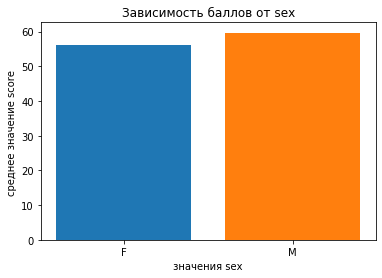

In [89]:
column_object_info(student, 'sex')
get_barplot('sex', student.loc[:, 'sex'].value_counts().index)

Пол ученика ('F' - женский, 'M' - мужской). Ошибочных значений нет. Оставляем как есть.

# address

Пропусков значений: 14 

Уникальных значений: 2 

 U    260
R     71
Name: address, dtype: int64
Среднее значения score для U : 58.94
Среднее значения score для R : 53.45


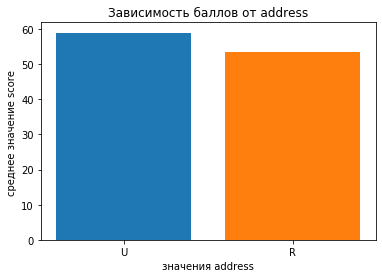

In [90]:
column_object_info(student, 'address')
get_barplot('address', student.loc[:, 'address'].value_counts().index)

Тип адреса ученика ('U' - городской, 'R' - за городом). Ошибочных значений нет. Учеников, проживающих в городе более чем в 3 раза больше, чем учеников, проживающих за городом. Заменим пропущенные значения на моду и не потеряем 14 строк.

In [91]:
fillna_mode(student, 'address')

Изменение среднего значения score после замены данных для U : -0.12 %
Изменение среднего значения score после замены данных для R : 0.0 %


# fam_size

Пропусков значений: 24 

Уникальных значений: 2 

 GT3    223
LE3     98
Name: fam_size, dtype: int64
Среднее значения score для GT3 : 57.65
Среднее значения score для LE3 : 58.83


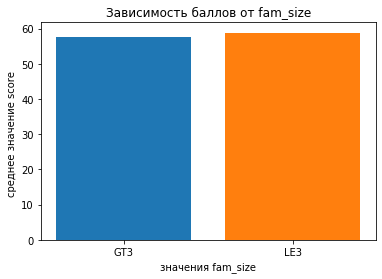

In [92]:
column_object_info(student, 'fam_size')
get_barplot('fam_size', student.loc[:, 'fam_size'].value_counts().index)

Размер семьи ('LE3' <= 3, 'GT3' >3). Ошибочных значений нет. Большинство семей имеет двух детей и более. Заменим пропущенные значения на моду и не потеряем 24 строки. 

In [93]:
fillna_mode(student, 'fam_size')

Изменение среднего значения score после замены данных для GT3 : 0.28 %
Изменение среднего значения score после замены данных для LE3 : 0.0 %


# p_status

Пропусков значений: 39 

Уникальных значений: 2 

 T    274
A     32
Name: p_status, dtype: int64
Среднее значения score для T : 57.41
Среднее значения score для A : 59.22


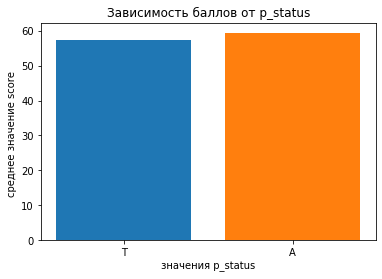

In [94]:
column_object_info(student, 'p_status')
get_barplot('p_status', student.loc[:, 'p_status'].value_counts().index)

Cтатус совместного жилья родителей ('T' - живут вместе 'A' - раздельно). Ошибочных значений нет. Большинство семей живут вместе, заменим пропущенные значения на моду и не потеряем 39 строк. 

In [95]:
fillna_mode(student, 'p_status')

Изменение среднего значения score после замены данных для T : -0.56 %
Изменение среднего значения score после замены данных для A : 0.0 %


# m_edu

Пропусков значений: 2 

Уникальных значений: 5 

 4.0    124
2.0     85
3.0     84
1.0     47
0.0      3
Name: m_edu, dtype: int64
Среднее значения score для 4.0 : 61.81
Среднее значения score для 2.0 : 56.18
Среднее значения score для 3.0 : 57.56
Среднее значения score для 1.0 : 51.38
Среднее значения score для 0.0 : 65.0


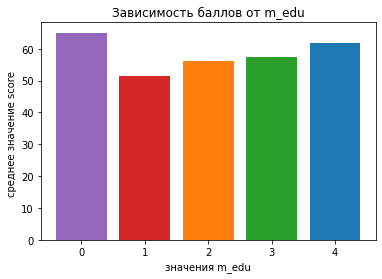

In [96]:
column_object_info(student, 'm_edu')
get_barplot('m_edu', student.loc[:, 'm_edu'].value_counts().index)

Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Ошибочных значений нет. Заменим пропущенные значения на моду. 

In [97]:
fillna_mode(student, 'm_edu')

Изменение среднего значения score после замены данных для 4.0 : 0.55 %
Изменение среднего значения score после замены данных для 2.0 : 0.0 %
Изменение среднего значения score после замены данных для 3.0 : 0.0 %
Изменение среднего значения score после замены данных для 1.0 : 0.0 %
Изменение среднего значения score после замены данных для 0.0 : 0.0 %


У столбца тип данных float64. Для избежания путаницы заменим тип данных на object, так как это - по сути номинативный столбец. В дальнейшем будем менять тип данных для всех номинативных столбцов на object.

In [98]:
student.m_edu = student.m_edu.astype('str')

# f_edu

Пропусков значений: 21 

Уникальных значений: 6 

 2.0     92
3.0     85
4.0     79
1.0     65
0.0      2
40.0     1
Name: f_edu, dtype: int64
Среднее значения score для 2.0 : 58.1
Среднее значения score для 3.0 : 57.0
Среднее значения score для 4.0 : 61.52
Среднее значения score для 1.0 : 53.46
Среднее значения score для 0.0 : 65.0
Среднее значения score для 40.0 : 60.0


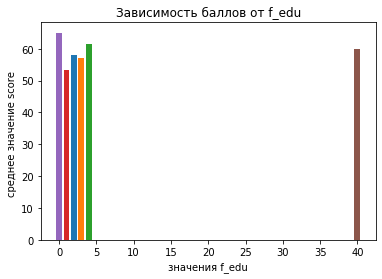

In [99]:
column_object_info(student, 'f_edu')
get_barplot('f_edu', student.loc[:, 'f_edu'].value_counts().index)

Образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Есть ошибочное значение 40.0, скорее всего - это опечатка, заменим его на 4.0. Заменим пропущенные значения на моду.

In [100]:
student.f_edu = student.f_edu.replace(40.0, 4.0)
fillna_mode(student, 'f_edu')
student.f_edu = student.f_edu.astype('str')

Изменение среднего значения score после замены данных для 2.0 : -0.45 %
Изменение среднего значения score после замены данных для 3.0 : 0.0 %
Изменение среднего значения score после замены данных для 4.0 : 0.0 %
Изменение среднего значения score после замены данных для 1.0 : 0.0 %
Изменение среднего значения score после замены данных для 0.0 : 0.0 %


# m_job

Пропусков значений: 17 

Уникальных значений: 5 

 other       111
services     88
teacher      50
at_home      49
health       30
Name: m_job, dtype: int64
Среднее значения score для other : 54.91
Среднее значения score для services : 59.49
Среднее значения score для teacher : 59.9
Среднее значения score для at_home : 54.08
Среднее значения score для health : 64.67


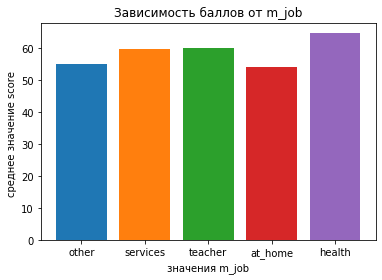

In [101]:
column_object_info(student, 'm_job')
get_barplot('m_job', student.loc[:, 'm_job'].value_counts().index)

Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). Заменим пропущенные значения на моду.

In [102]:
fillna_mode(student, 'm_job')

Изменение среднего значения score после замены данных для other : -1.66 %
Изменение среднего значения score после замены данных для services : 0.0 %
Изменение среднего значения score после замены данных для teacher : 0.0 %
Изменение среднего значения score после замены данных для at_home : 0.0 %
Изменение среднего значения score после замены данных для health : 0.0 %


# f_job

Пропусков значений: 32 

Уникальных значений: 5 

 other       174
services     85
teacher      25
health       15
at_home      14
Name: f_job, dtype: int64
Среднее значения score для other : 56.78
Среднее значения score для services : 56.59
Среднее значения score для teacher : 66.0
Среднее значения score для health : 55.67
Среднее значения score для at_home : 59.29


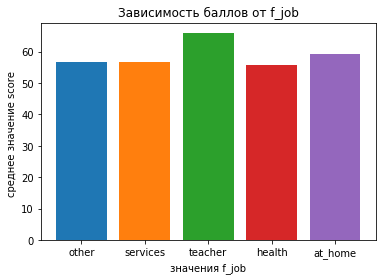

In [103]:
column_object_info(student, 'f_job')
get_barplot('f_job', student.loc[:, 'f_job'].value_counts().index)

Работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [104]:
fillna_mode(student, 'f_job')

Изменение среднего значения score после замены данных для other : -1.23 %
Изменение среднего значения score после замены данных для services : 0.0 %
Изменение среднего значения score после замены данных для teacher : 0.0 %
Изменение среднего значения score после замены данных для health : 0.0 %
Изменение среднего значения score после замены данных для at_home : 0.0 %


# reason

Пропусков значений: 15 

Уникальных значений: 4 

 course        118
reputation     93
home           87
other          32
Name: reason, dtype: int64
Среднее значения score для course : 56.61
Среднее значения score для reputation : 59.57
Среднее значения score для home : 58.28
Среднее значения score для other : 56.72


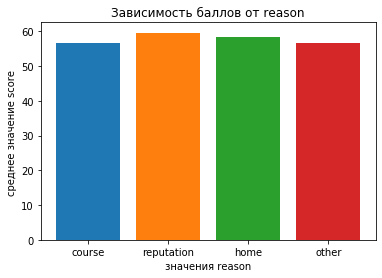

In [105]:
column_object_info(student, 'reason')
get_barplot('reason', student.loc[:, 'reason'].value_counts().index)

Причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [106]:
fillna_mode(student, 'reason')

Изменение среднего значения score после замены данных для course : -0.14 %
Изменение среднего значения score после замены данных для reputation : 0.0 %
Изменение среднего значения score после замены данных для home : 0.0 %
Изменение среднего значения score после замены данных для other : 0.0 %


# guardian

Пропусков значений: 28 

Уникальных значений: 3 

 mother    221
father     78
other      18
Name: guardian, dtype: int64
Среднее значения score для mother : 58.01
Среднее значения score для father : 58.91
Среднее значения score для other : 55.56


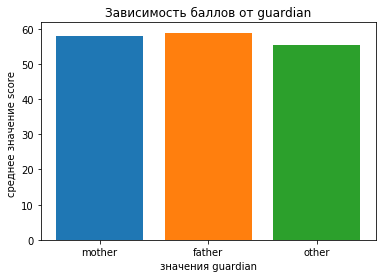

In [107]:
column_object_info(student, 'guardian')
get_barplot('guardian', student.loc[:, 'guardian'].value_counts().index)

Опекун ('mother' - мать, 'father' - отец, 'other' - другое). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [108]:
fillna_mode(student, 'guardian')

Изменение среднего значения score после замены данных для mother : 0.52 %
Изменение среднего значения score после замены данных для father : 0.0 %
Изменение среднего значения score после замены данных для other : 0.0 %


# travel_time

Пропусков значений: 23 

Уникальных значений: 4 

 1.0    214
2.0     84
3.0     17
4.0      7
Name: travel_time, dtype: int64
Среднее значения score для 1.0 : 58.53
Среднее значения score для 2.0 : 56.9
Среднее значения score для 3.0 : 57.35
Среднее значения score для 4.0 : 50.0


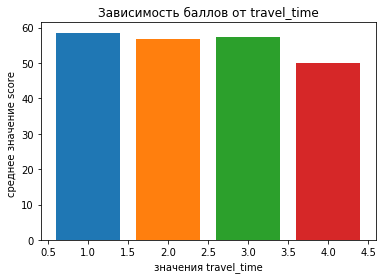

In [109]:
column_object_info(student, 'travel_time')
get_barplot('travel_time', student.loc[:, 'travel_time'].value_counts().index)

Время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) Заменим пропущенные значения на моду.

In [110]:
fillna_mode(student, 'travel_time')
student.travel_time = student.travel_time.astype('str')

Изменение среднего значения score после замены данных для 1.0 : 0.09 %
Изменение среднего значения score после замены данных для 2.0 : 0.0 %
Изменение среднего значения score после замены данных для 3.0 : 0.0 %
Изменение среднего значения score после замены данных для 4.0 : 0.0 %


# study_time

Пропусков значений: 7 

Уникальных значений: 4 

 2.0    168
1.0     89
3.0     57
4.0     24
Name: study_time, dtype: int64
Среднее значения score для 2.0 : 55.57
Среднее значения score для 1.0 : 56.8
Среднее значения score для 3.0 : 62.89
Среднее значения score для 4.0 : 63.33


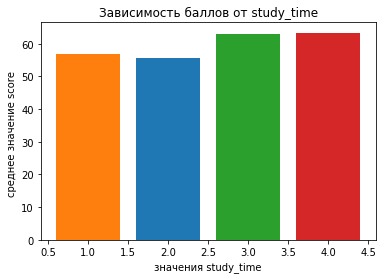

In [111]:
column_object_info(student, 'study_time')
get_barplot('study_time', student.loc[:, 'study_time'].value_counts().index)

Время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [112]:
fillna_mode(student, 'study_time')
student.study_time = student.study_time.astype('str')

Изменение среднего значения score после замены данных для 2.0 : -0.83 %
Изменение среднего значения score после замены данных для 1.0 : 0.0 %
Изменение среднего значения score после замены данных для 3.0 : 0.0 %
Изменение среднего значения score после замены данных для 4.0 : 0.0 %


# failures

Пропусков значений: 20 

Уникальных значений: 4 

 0.0    269
1.0     36
2.0     10
3.0     10
Name: failures, dtype: int64
Среднее значения score для 0.0 : 59.59
Среднее значения score для 1.0 : 50.69
Среднее значения score для 2.0 : 44.0
Среднее значения score для 3.0 : 41.5


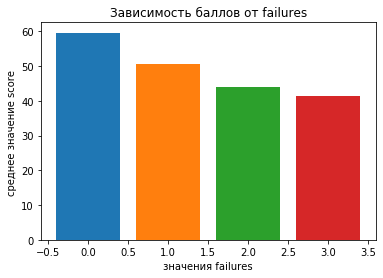

In [113]:
column_object_info(student, 'failures')
get_barplot('failures', student.loc[:, 'failures'].value_counts().index)

Количество внеучебных неудач (n, если 1<=n<=3, иначе 0). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [114]:
fillna_mode(student, 'failures')
student.failures = student.failures.astype('str')

Изменение среднего значения score после замены данных для 0.0 : -0.37 %
Изменение среднего значения score после замены данных для 1.0 : 0.0 %
Изменение среднего значения score после замены данных для 2.0 : 0.0 %
Изменение среднего значения score после замены данных для 3.0 : 0.0 %


# school_sup	

Пропусков значений: 9 

Уникальных значений: 2 

 no     290
yes     46
Name: school_sup, dtype: int64
Среднее значения score для no : 59.86
Среднее значения score для yes : 47.07


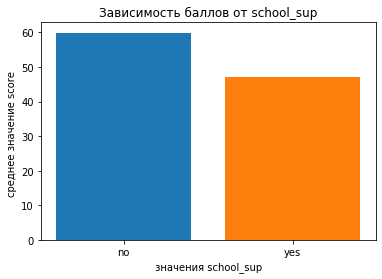

In [115]:
column_object_info(student, 'school_sup')
get_barplot('school_sup', student.loc[:, 'school_sup'].value_counts().index)

Дополнительная образовательная поддержка (yes или no) .Ошибочных значений нет. Заменим пропущенные значения на моду

In [116]:
fillna_mode(student, 'school_sup')

Изменение среднего значения score после замены данных для no : 0.55 %
Изменение среднего значения score после замены данных для yes : 0.0 %


# fam_sup

Пропусков значений: 34 

Уникальных значений: 2 

 yes    192
no     119
Name: fam_sup, dtype: int64
Среднее значения score для yes : 57.24
Среднее значения score для no : 58.61


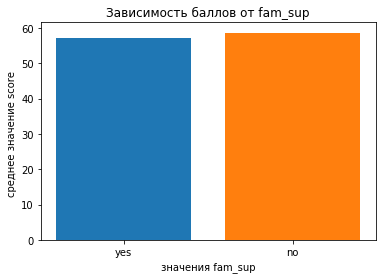

In [117]:
column_object_info(student, 'fam_sup')
get_barplot('fam_sup', student.loc[:, 'fam_sup'].value_counts().index)

Cемейная образовательная поддержка (yes или no). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [118]:
fillna_mode(student, 'fam_sup')

Изменение среднего значения score после замены данных для yes : -0.42 %
Изменение среднего значения score после замены данных для no : 0.0 %


# paid

Пропусков значений: 36 

Уникальных значений: 2 

 no     166
yes    143
Name: paid, dtype: int64
Среднее значения score для no : 58.4
Среднее значения score для yes : 57.87


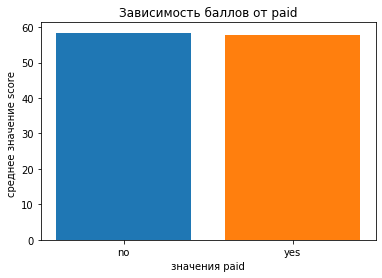

In [119]:
column_object_info(student, 'paid')
get_barplot('paid', student.loc[:, 'paid'].value_counts().index)

Дополнительные платные занятия по математике (yes или no). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [120]:
fillna_mode(student, 'paid')

Изменение среднего значения score после замены данных для no : 0.91 %
Изменение среднего значения score после замены данных для yes : 0.0 %


# activities

Пропусков значений: 12 

Уникальных значений: 2 

 yes    170
no     163
Name: activities, dtype: int64
Среднее значения score для yes : 58.94
Среднее значения score для no : 56.93


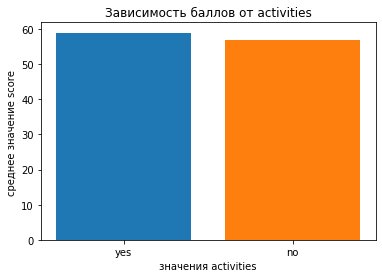

In [121]:
column_object_info(student, 'activities')
get_barplot('activities', student.loc[:, 'activities'].value_counts().index)

Дополнительные внеучебные занятия (yes или no). Ошибочных значений нет. Заменим пропущенные значения на моду. 

In [122]:
fillna_mode(student, 'activities')

Изменение среднего значения score после замены данных для yes : 0.39 %
Изменение среднего значения score после замены данных для no : 0.0 %


# nursery

Пропусков значений: 12 

Уникальных значений: 2 

 yes    266
no      67
Name: nursery, dtype: int64
Среднее значения score для yes : 57.93
Среднее значения score для no : 56.79


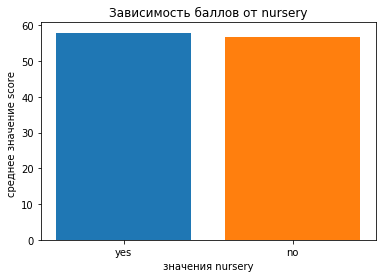

In [123]:
column_object_info(student, 'nursery')
get_barplot('nursery', student.loc[:, 'nursery'].value_counts().index)

Посещал детский сад (yes или no). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [124]:
fillna_mode(student, 'nursery')

Изменение среднего значения score после замены данных для yes : -0.35 %
Изменение среднего значения score после замены данных для no : 0.0 %


# studytime_granular

In [125]:
column_object_info(student, 'studytime_granular')

Пропусков значений: 7 

Уникальных значений: 4 

 -6.0     168
-3.0      89
-9.0      57
-12.0     24
Name: studytime_granular, dtype: int64


Столбец без описания значений. Узнаем его связь с study_time.

In [126]:
student_corr = student.loc[:, ['study_time', 'studytime_granular']]
student_corr.study_time = student_corr.study_time.astype('float64')
display(student_corr.corr())

,study_time,studytime_granular
study_time,1.0,-1.0
studytime_granular,-1.0,1.0


Столбцы study_time и studytime_granular скоррелированы полностью, одну переменную можно исключить. Пусть это будет переменная studytime_granular.

In [127]:
student.drop(['studytime_granular'], inplace=True, axis=1)

# higher

Пропусков значений: 19 

Уникальных значений: 2 

 yes    314
no      12
Name: higher, dtype: int64
Среднее значения score для yes : 58.17
Среднее значения score для no : 49.58


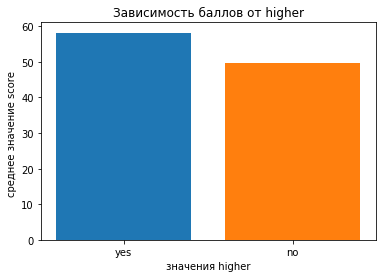

In [128]:
column_object_info(student, 'higher')
get_barplot('higher', student.loc[:, 'higher'].value_counts().index)

Ученик хочет получить высшее образование (yes или no). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [129]:
fillna_mode(student, 'higher')

Изменение среднего значения score после замены данных для yes : 0.0 %
Изменение среднего значения score после замены данных для no : 0.0 %


# internet

Пропусков значений: 29 

Уникальных значений: 2 

 yes    268
no      48
Name: internet, dtype: int64
Среднее значения score для yes : 58.26
Среднее значения score для no : 55.31


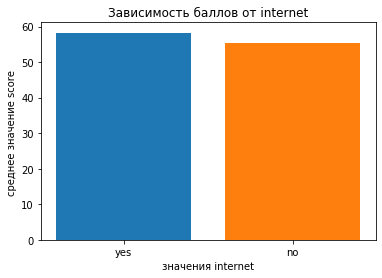

In [130]:
column_object_info(student, 'internet')
get_barplot('internet', student.loc[:, 'internet'].value_counts().index)

Наличие интернета дома (yes или no). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [131]:
fillna_mode(student, 'internet')

Изменение среднего значения score после замены данных для yes : -0.03 %
Изменение среднего значения score после замены данных для no : 0.0 %


# romantic

Пропусков значений: 29 

Уникальных значений: 2 

 no     216
yes    100
Name: romantic, dtype: int64
Среднее значения score для no : 58.52
Среднее значения score для yes : 56.85


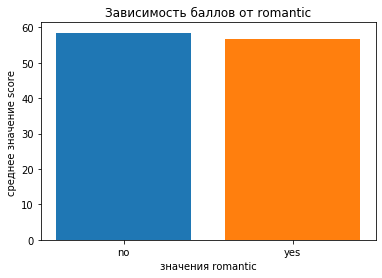

In [132]:
column_object_info(student, 'romantic')
get_barplot('romantic', student.loc[:, 'romantic'].value_counts().index)

В романтических отношениях (yes или no). Ошибочных значений нет. Заменим пропущенные значения на моду.

In [133]:
fillna_mode(student, 'romantic')

Изменение среднего значения score после замены данных для no : 0.39 %
Изменение среднего значения score после замены данных для yes : 0.0 %


# fam_rel

Пропусков значений: 23 

Уникальных значений: 6 

  4.0    160
 5.0     86
 3.0     56
 2.0     13
 1.0      6
-1.0      1
Name: fam_rel, dtype: int64
Среднее значения score для 4.0 : 56.44
Среднее значения score для 5.0 : 60.93
Среднее значения score для 3.0 : 56.96
Среднее значения score для 2.0 : 56.92
Среднее значения score для 1.0 : 64.17
Среднее значения score для -1.0 : 40.0


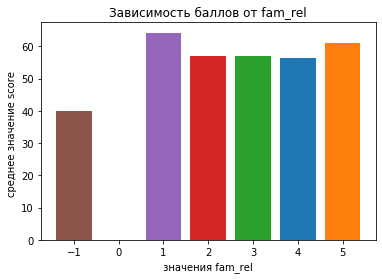

In [134]:
column_object_info(student, 'fam_rel')
get_barplot('fam_rel', student.loc[:, 'fam_rel'].value_counts().index)

Семейные отношения (от 1 - очень плохо, до 5 - очень хорошо). Есть ошибочное значение -1.0, похоже на опечатку, заменим его на 1.0. Заменим пропущенные значения на моду.

In [135]:
student.fam_rel = student.fam_rel.replace(-1.0, 1.0)
fillna_mode(student, 'fam_rel')
student.fam_rel = student.fam_rel.astype('str')

Изменение среднего значения score после замены данных для 4.0 : -0.41 %
Изменение среднего значения score после замены данных для 5.0 : 0.0 %
Изменение среднего значения score после замены данных для 3.0 : 0.0 %
Изменение среднего значения score после замены данных для 2.0 : 0.0 %
Изменение среднего значения score после замены данных для 1.0 : 0.0 %


# free_time

Пропусков значений: 7 

Уникальных значений: 5 

 3.0    129
4.0    102
2.0     59
5.0     34
1.0     14
Name: free_time, dtype: int64
Среднее значения score для 3.0 : 56.4
Среднее значения score для 4.0 : 56.76
Среднее значения score для 2.0 : 61.44
Среднее значения score для 5.0 : 60.0
Среднее значения score для 1.0 : 55.0


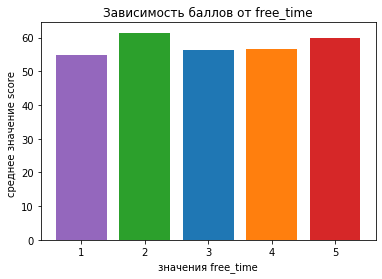

In [136]:
column_object_info(student, 'free_time')
get_barplot('free_time', student.loc[:, 'free_time'].value_counts().index)

Свободное время после школы (от 1 - очень мало до 5 - очень мого). Заменим пропущенные значения на моду.

In [137]:
fillna_mode(student, 'free_time')
student.free_time = student.free_time.astype('str')

Изменение среднего значения score после замены данных для 3.0 : -0.9 %
Изменение среднего значения score после замены данных для 4.0 : 0.0 %
Изменение среднего значения score после замены данных для 2.0 : 0.0 %
Изменение среднего значения score после замены данных для 5.0 : 0.0 %
Изменение среднего значения score после замены данных для 1.0 : 0.0 %


# go_out

Пропусков значений: 6 

Уникальных значений: 5 

 3.0    116
2.0     91
4.0     72
5.0     43
1.0     17
Name: go_out, dtype: int64
Среднее значения score для 3.0 : 59.09
Среднее значения score для 2.0 : 61.54
Среднее значения score для 4.0 : 54.51
Среднее значения score для 5.0 : 52.79
Среднее значения score для 1.0 : 59.12


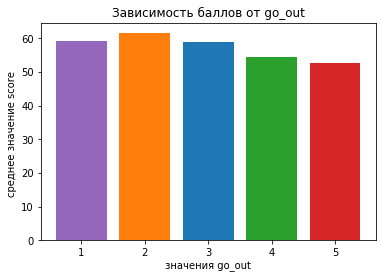

In [138]:
column_object_info(student, 'go_out')
get_barplot('go_out', student.loc[:, 'go_out'].value_counts().index)

Проведение времени с друзьями (от 1 - очень мало до 5 - очень много). Заменим пропущенные значения на моду.

In [139]:
fillna_mode(student, 'go_out')
student.go_out = student.go_out.astype('str')

Изменение среднего значения score после замены данных для 3.0 : 0.61 %
Изменение среднего значения score после замены данных для 2.0 : 0.0 %
Изменение среднего значения score после замены данных для 4.0 : 0.0 %
Изменение среднего значения score после замены данных для 5.0 : 0.0 %
Изменение среднего значения score после замены данных для 1.0 : 0.0 %


# health

Пропусков значений: 13 

Уникальных значений: 5 

 5.0    122
3.0     79
4.0     51
1.0     44
2.0     36
Name: health, dtype: int64
Среднее значения score для 5.0 : 57.79
Среднее значения score для 3.0 : 54.62
Среднее значения score для 4.0 : 58.14
Среднее значения score для 1.0 : 62.5
Среднее значения score для 2.0 : 61.39


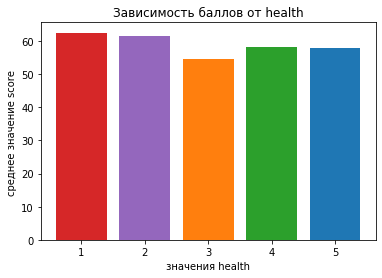

In [140]:
column_object_info(student, 'health')
get_barplot('health', student.loc[:, 'health'].value_counts().index)

Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо). Заменим пропущенные значения на моду.

In [141]:
fillna_mode(student, 'health')
student.health = student.health.astype('str')

Изменение среднего значения score после замены данных для 5.0 : 0.99 %
Изменение среднего значения score после замены данных для 3.0 : 0.0 %
Изменение среднего значения score после замены данных для 4.0 : 0.0 %
Изменение среднего значения score после замены данных для 1.0 : 0.0 %
Изменение среднего значения score после замены данных для 2.0 : 0.0 %


#  Корреляционный анализ

Выясним какие столбцы коррелируют c баллами по госэкзамену по математике. Это поможет понять какие параметры стоит оставить для модели, а какие — исключить. Корреляции рассмотрим только для числовых столбцов.

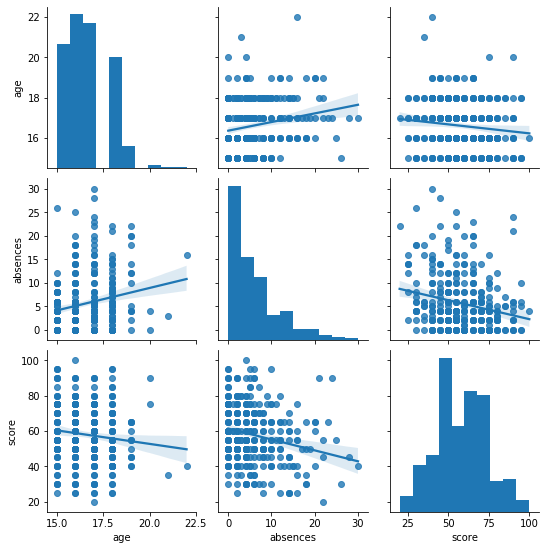

In [142]:
sns.pairplot(student[['age', 'absences', 'score']], kind='reg')

In [143]:
student.corr()

,age,absences,score
age,1.000000,0.202105,-0.116871
absences,0.202105,1.000000,-0.223250
score,-0.116871,-0.223250,1.000000


Итого: имеем две слабоскоррелированные с баллами за экзамен переменные - absences  и age.  Отрицательная корреляция переменных score и age говорит о том, что 'возрастные' ученики сдают экзамен хуже. Положительная корреляция переменных  absences и age говорит о том, что 'возрастные' ученики пропускают занятия чаще. Интересна слабая отрицательная корреляция между absences и score (это кажется не очень логичным).

# Анализ номинативных переменных

Для номинативных переменных использовать корреляционный анализ не получится. Однако, можно посмотреть различаются ли распределения баллов за экзамен в зависимости от значения этих переменных. Сделаем это с помощью box-plot. 
Номинативные переменные, которые осталось рассмотреть: sex, address, fam_size, p_status, m_edu, f_edu, m_job, f_job, reason, guardian, travel_time, study_time, failures, school_sup, fam_sup, paid, activities, nursery, higher, internet, romantic, fam_rel, free_time, go_out, health. Напишем функцию построения  графиков - get_boxplot.


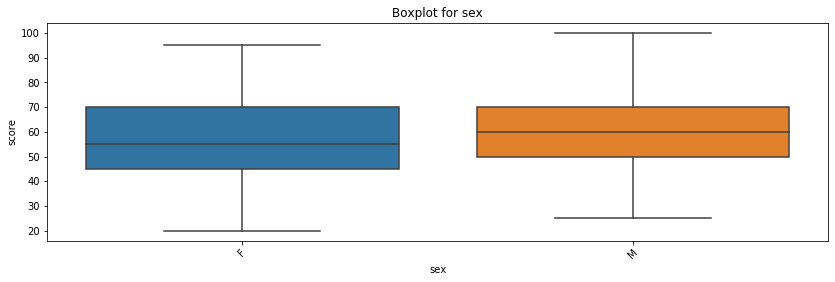

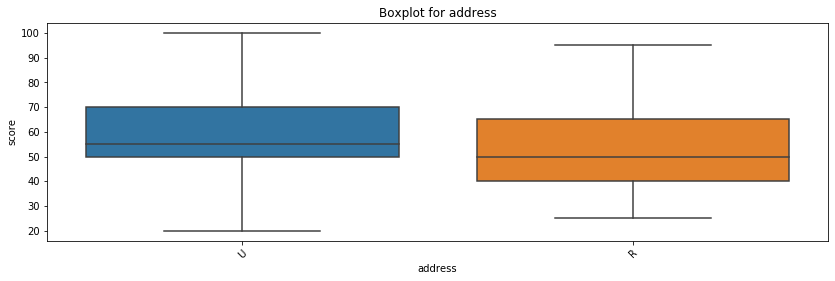

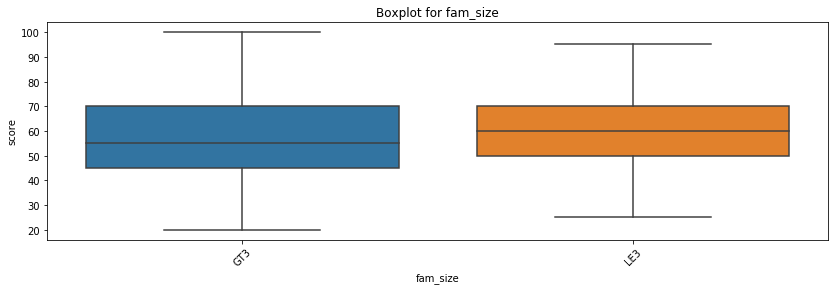

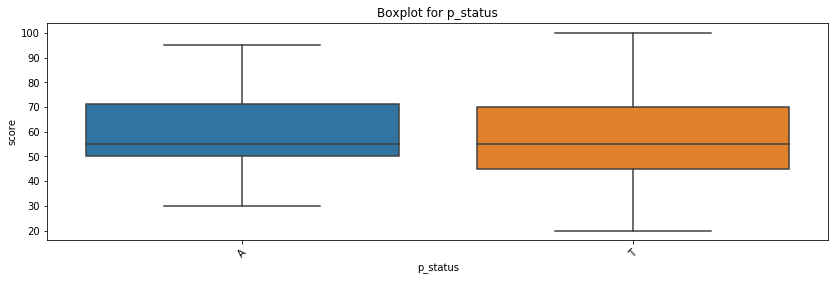

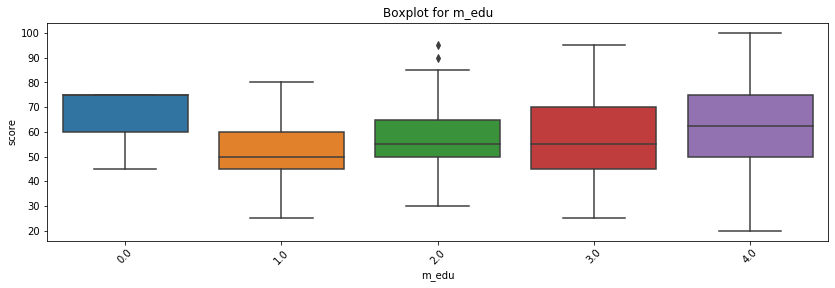

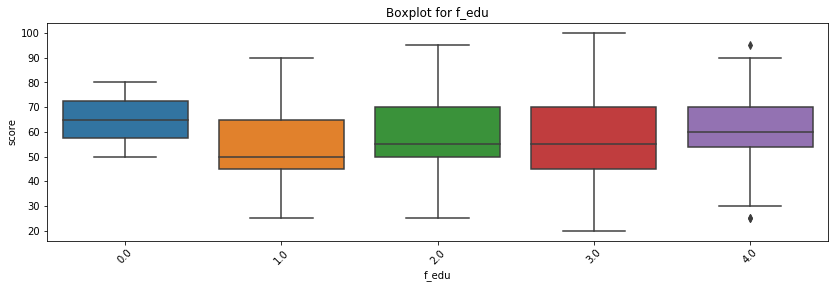

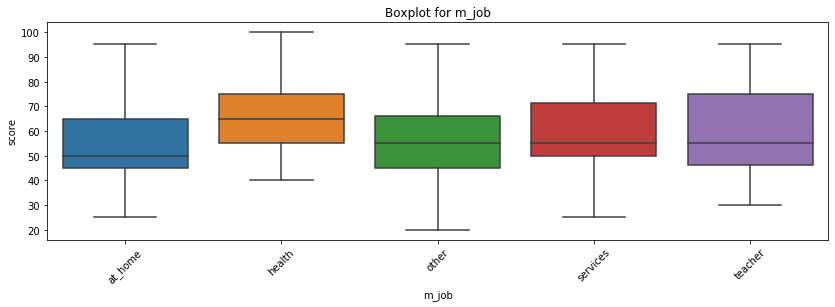

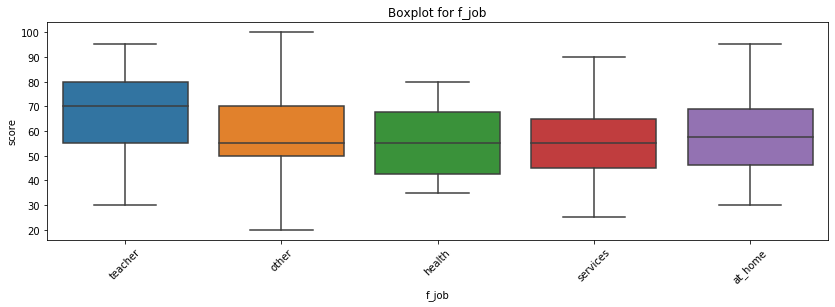

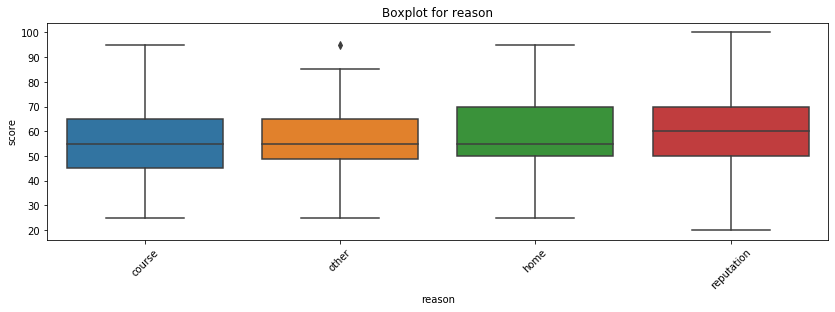

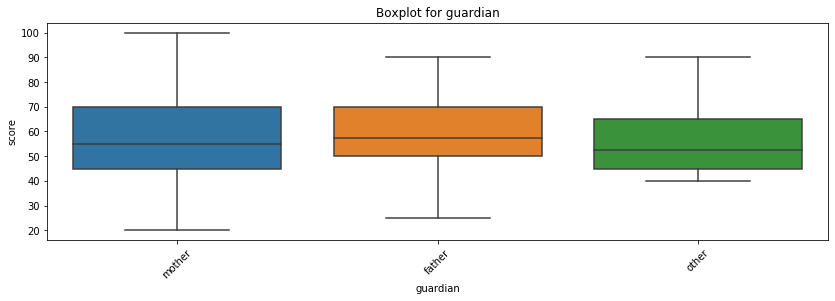

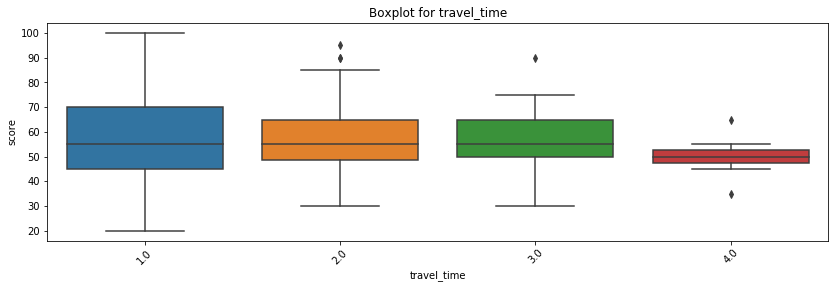

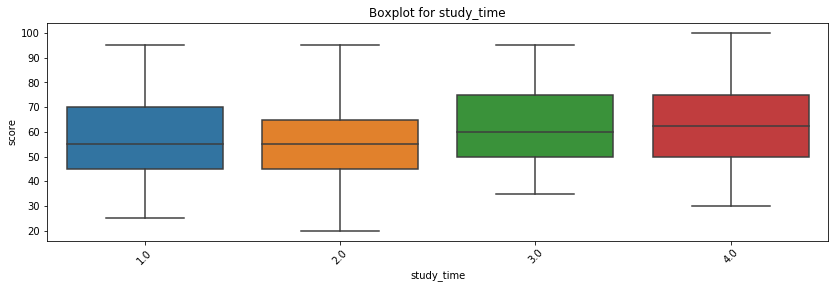

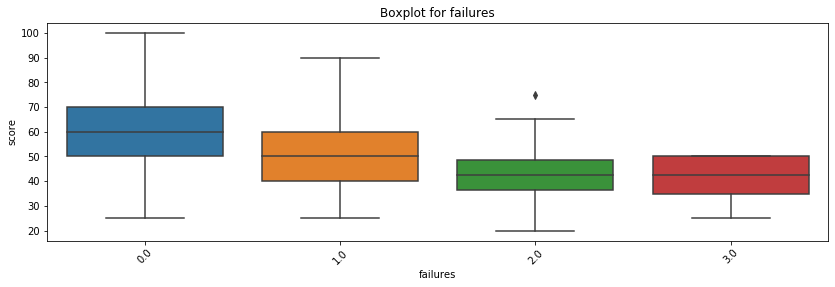

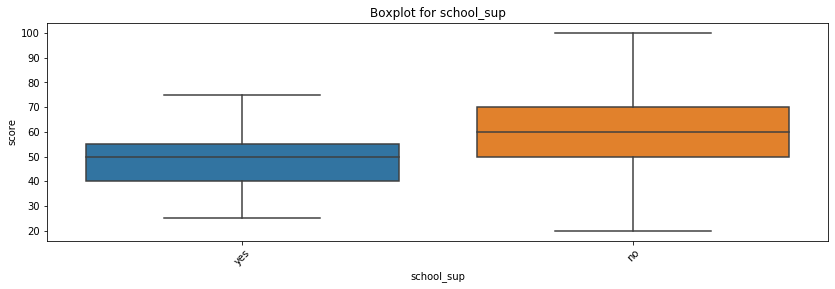

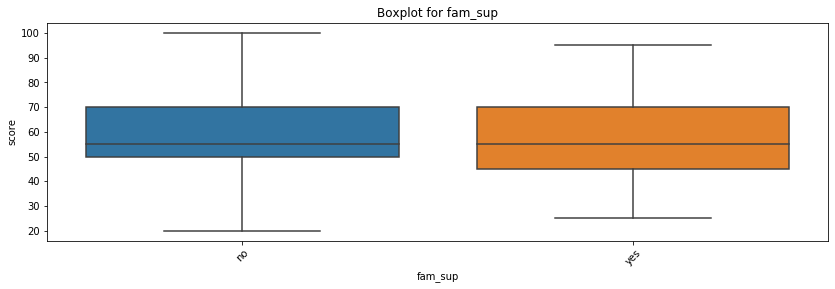

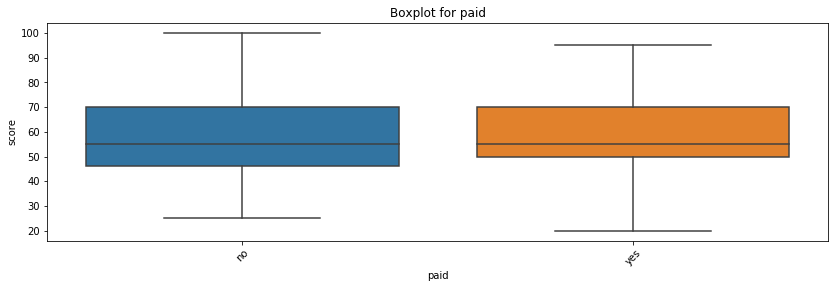

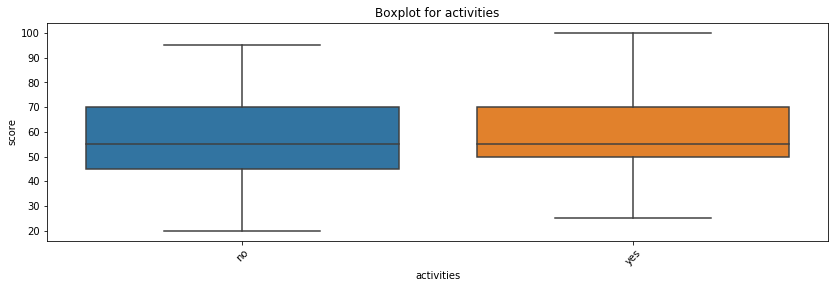

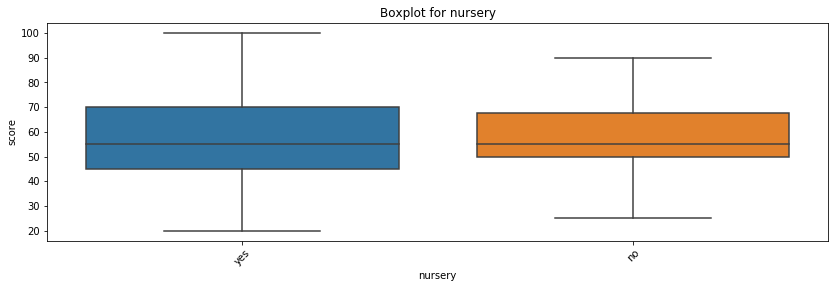

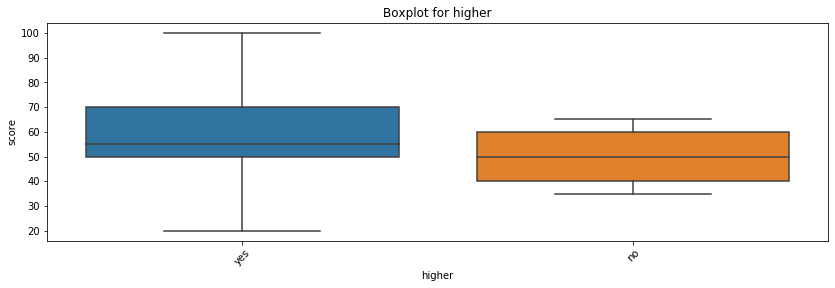

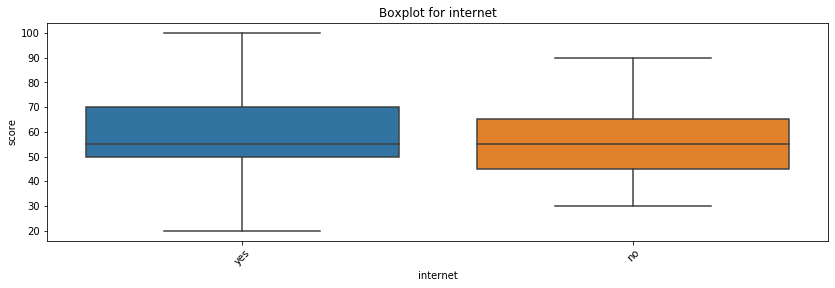

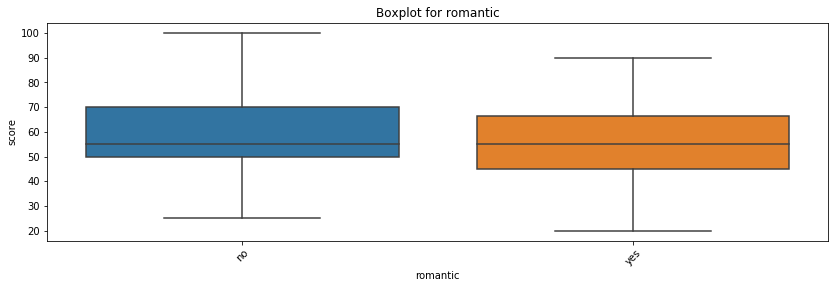

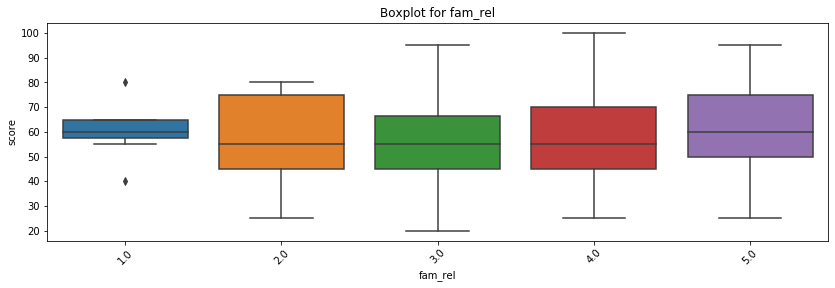

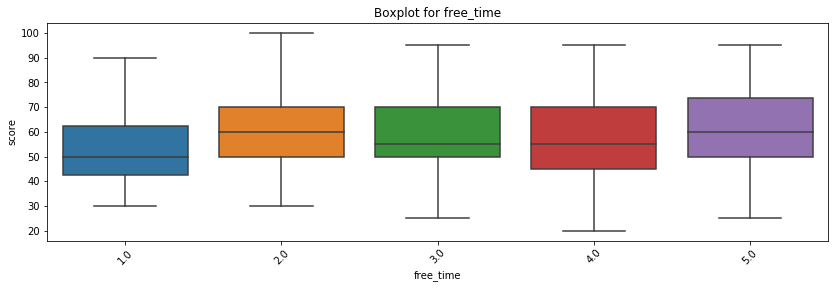

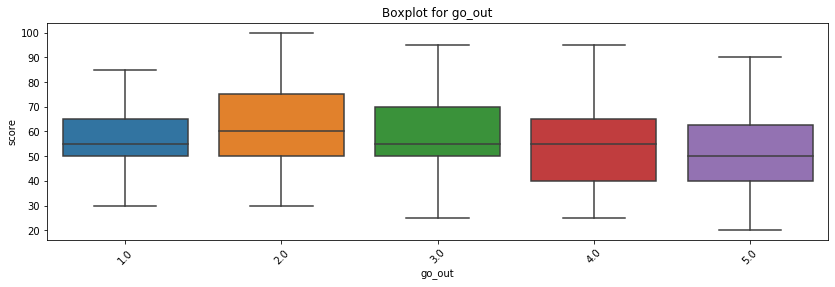

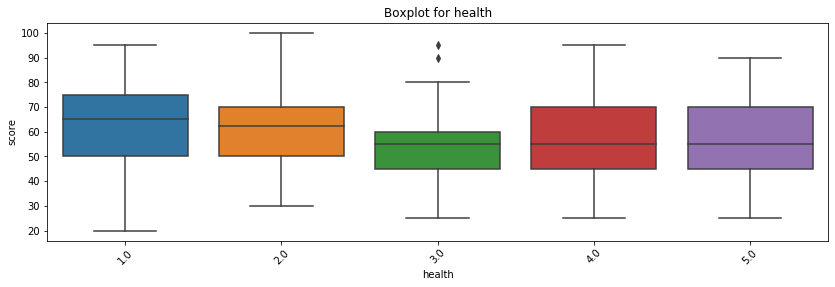

In [144]:
for col in ['sex', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
            'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
            'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'health']:
    get_boxplot(col)

По графикам видно, что одни параметры (m_edu, f_edu, failures, higher, free_time, health)  могут значительно влиять на оценку по экзамену. Влияние остальных параметров не так очевидно. Проверим есть ли статистическая разница в распределении оценок за экзамен по номинативным признакам с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок за экзамен по различным параметрам неразличимы:

In [145]:
def get_stat_dif(column, alfa):
    cols = student.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(student.loc[student.loc[:, column] == comb[0], 'score'],
                     student.loc[student.loc[:, column] == comb[1], 'score']).pvalue \
                <= alfa:
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['sex', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
            'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
            'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'health']:
    get_stat_dif(col, 0.05)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки f_job
Найдены статистически значимые различия для колонки study_time
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки school_sup
Найдены статистически значимые различия для колонки fam_rel
Найдены статистически значимые различия для колонки go_out
Найдены статистически значимые различия для колонки health


Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: age, absences, sex, address, m_edu, f_edu, m_job, f_job, study_time, failures, school_sup, fam_rel, go_out, health, score

In [153]:
student_for_model = student.loc[:, ['age', 'absences', 'sex', 'address', 'm_edu', 'f_edu', 'm_job',
                                    'f_job', 'study_time', 'failures', 'school_sup', 'fam_rel', 'go_out', 'health', 'score']]
student_for_model.head()

,age,absences,sex,address,m_edu,f_edu,m_job,f_job,study_time,failures,school_sup,fam_rel,go_out,health,score
0,18,6.0,F,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,4.0,4.0,3.0,30.0
1,17,4.0,F,U,1.0,1.0,at_home,other,2.0,0.0,no,5.0,3.0,3.0,30.0
2,15,10.0,F,U,1.0,1.0,at_home,other,2.0,3.0,yes,4.0,2.0,3.0,50.0
3,15,2.0,F,U,4.0,2.0,health,other,3.0,0.0,no,3.0,2.0,5.0,75.0
4,16,4.0,F,U,3.0,3.0,other,other,2.0,0.0,no,4.0,2.0,5.0,50.0


# Выводы:

В результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике были получены следующие выводы:

 - В данных много строк имеют пустые значения (от 1 до 6 на  строку). Строки с пустыми значениями удалить не получится(потеряем большую часть данных), поэтому их восполним, исходя из других данных в датасете.
 - Выбросы найдены  в столбцах age и absences. Пользуясь здравым смыслом часть из них оставлена. Много 0 значений в целевом столбце score (возможно студенты, получившие - 0 по неясным причинам не сдавали экзамен).
 - В некоторых номинативных столбцах есть ошибки (опечатки).
 - Качество данных хорошее. Отсутствует лишь незначительная часть значений (около 5%). 
 - Важные параметры, которые предлагается использовать в дальнейшем для построения модели - это с 95% вероятностью: age, absences, sex, address, m_edu, f_edu, m_job, f_job, study_time, failures, school_sup, fam_rel, go_out, health, score
 - Выборка данных мала, любые манипуляции с пропущенными значениями влияют на итоговые параметры для модели.
 


 Для ментора

1. Главный вопрос : что делать с пропусками и 0 значениями целевого столбца score? Удалив 0  - потерял около 10% данных, заменив 0 на медиану - получил различия в переменных, влияющих на модель. Оставлять 0 бессмысленно, он только искажает результат (очень маловероятно, что ученик сдал экзамен на 0 из 100, так как значений от 0 до 20 попросту нет). Правильно ли вообще пытаться заменить целевые значения?
2. Почти во всех столбцах заменял пропуски на моду и наглядно смотрел на зависимость среднего балла от признака категории. После внесения изменений смотрел насколько поменялось среднее значение балла в процентах. В одних столбцах это изменение ничтожно, в других менялось больше, чем на 1%. Внося изменения в данные мы так или иначе меняем их связь с целевой переменной. Как оценить сильно мы исказили взаимосвязь? Средний балл по признаку изменился на 1% - это много или мало? 
3. В столбце absences есть выбросы. Есть ли смысл убрать лишь противоречащие логики значения (385 - больше, чем дней в году и 212 - большая часть года)? Все остальные значения выбросов можно объяснить(ученик болел, уезжал и т.д.)